In [2]:
import pandas as pd
import numpy as np


In [3]:
train=pd.read_csv('train_values_oAriVNN.csv')
train.head(25)

,row_id,county_code,year,state,population,renter_occupied_households,pct_renter_occupied,median_gross_rent,median_household_income,median_property_value,...,pop_per_primary_care_physician,pct_female,pct_below_18_years_of_age,pct_aged_65_years_and_older,pct_adults_less_than_a_high_school_diploma,pct_adults_with_high_school_diploma,pct_adults_with_some_college,pct_adults_bachelors_or_higher,birth_rate_per_1k,death_rate_per_1k
0,0,a4e2211,b,d725a95,45009.0,6944.0,37.218,643.0,33315.0,98494.0,...,1960.0,0.532,0.252,0.153,0.233000,0.375000,0.278000,0.114000,12.915129,11.205112
1,1,583e0c7,a,533155c,9872.0,1224.0,31.773,517.0,43724.0,85444.0,...,890.0,0.509,0.252,0.188,0.073293,0.397590,0.331325,0.197791,11.049159,12.276843
2,2,4776bfd,b,d725a95,17625.0,1725.0,21.973,671.0,37777.0,136162.0,...,3509.0,0.451,0.166,0.189,0.206587,0.303393,0.301397,0.188623,7.903576,10.161741
3,3,97fb48d,a,d725a95,134136.0,18180.0,36.809,603.0,30607.0,70062.0,...,2219.0,0.519,0.263,0.125,0.248255,0.334995,0.290130,0.126620,13.137119,10.202072
4,4,47a9ba3,a,be99678,6936.0,551.0,17.627,668.0,44237.0,187066.0,...,3410.0,0.487,0.196,0.203,0.058648,0.276342,0.413519,0.251491,6.084752,5.939877
5,5,2f5d62b,b,dc52510,985597.0,195220.0,48.578,1001.0,57207.0,240149.0,...,1030.0,0.513,0.233,0.097,0.090547,0.179104,0.235821,0.494527,12.632218,6.101172
6,6,2406c8b,a,f93b51e,18330.0,2256.0,30.415,522.0,29778.0,88617.0,...,3100.0,0.511,0.251,0.188,0.222555,0.410180,0.244511,0.122754,13.568595,11.598960
7,7,801bf91,a,56f170e,185248.0,13778.0,18.446,953.0,91954.0,255951.0,...,820.0,0.501,0.279,0.111,0.033932,0.204591,0.243513,0.517964,11.188855,5.840394
8,8,82dbbf7,b,a972798,46558.0,4382.0,23.017,674.0,48484.0,124230.0,...,1559.0,0.506,0.259,0.155,0.154154,0.405405,0.256256,0.184184,11.588893,10.033765
9,9,23c3967,b,a8981de,27319.0,2543.0,21.691,617.0,35375.0,78601.0,...,1950.0,0.516,0.259,0.148,0.204795,0.391608,0.276723,0.126873,12.477718,10.476918


In [4]:
print(train.shape)
print(train.county_code.unique().shape)

(2546, 48)
(1296,)


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2546 entries, 0 to 2545
Data columns (total 48 columns):
row_id                                        2546 non-null int64
county_code                                   2546 non-null object
year                                          2546 non-null object
state                                         2546 non-null object
population                                    2546 non-null float64
renter_occupied_households                    2546 non-null float64
pct_renter_occupied                           2546 non-null float64
median_gross_rent                             2546 non-null float64
median_household_income                       2544 non-null float64
median_property_value                         2544 non-null float64
rent_burden                                   2546 non-null float64
pct_white                                     2546 non-null float64
pct_af_am                                     2546 non-null float64
pct_hispanic  

In [6]:

lb=pd.read_csv('train_labels.csv')
lb.head(25)

,row_id,evictions
0,0,681
1,1,0
2,2,29
3,3,841
4,4,2
5,5,4191
6,6,24
7,7,225
8,8,93
9,9,6


In [7]:
result=train.merge(lb,on='row_id')

In [8]:
result.head()

,row_id,county_code,year,state,population,renter_occupied_households,pct_renter_occupied,median_gross_rent,median_household_income,median_property_value,...,pct_female,pct_below_18_years_of_age,pct_aged_65_years_and_older,pct_adults_less_than_a_high_school_diploma,pct_adults_with_high_school_diploma,pct_adults_with_some_college,pct_adults_bachelors_or_higher,birth_rate_per_1k,death_rate_per_1k,evictions
0,0,a4e2211,b,d725a95,45009.0,6944.0,37.218,643.0,33315.0,98494.0,...,0.532,0.252,0.153,0.233000,0.375000,0.278000,0.114000,12.915129,11.205112,681
1,1,583e0c7,a,533155c,9872.0,1224.0,31.773,517.0,43724.0,85444.0,...,0.509,0.252,0.188,0.073293,0.397590,0.331325,0.197791,11.049159,12.276843,0
2,2,4776bfd,b,d725a95,17625.0,1725.0,21.973,671.0,37777.0,136162.0,...,0.451,0.166,0.189,0.206587,0.303393,0.301397,0.188623,7.903576,10.161741,29
3,3,97fb48d,a,d725a95,134136.0,18180.0,36.809,603.0,30607.0,70062.0,...,0.519,0.263,0.125,0.248255,0.334995,0.290130,0.126620,13.137119,10.202072,841
4,4,47a9ba3,a,be99678,6936.0,551.0,17.627,668.0,44237.0,187066.0,...,0.487,0.196,0.203,0.058648,0.276342,0.413519,0.251491,6.084752,5.939877,2


In [9]:
result.describe()

,row_id,population,renter_occupied_households,pct_renter_occupied,median_gross_rent,median_household_income,median_property_value,rent_burden,pct_white,pct_af_am,...,pct_female,pct_below_18_years_of_age,pct_aged_65_years_and_older,pct_adults_less_than_a_high_school_diploma,pct_adults_with_high_school_diploma,pct_adults_with_some_college,pct_adults_bachelors_or_higher,birth_rate_per_1k,death_rate_per_1k,evictions
count,2546.000000,2.546000e+03,2546.000000,2546.00000,2546.000000,2544.000000,2544.000000,2546.000000,2546.000000,2546.000000,...,2546.000000,2546.000000,2546.000000,2546.000000,2546.000000,2546.000000,2546.000000,2546.000000,2546.000000,2546.000000
mean,1272.500000,1.062459e+05,15008.009034,28.14739,688.838178,46050.601415,129609.579009,28.520561,0.776272,0.089774,...,0.499126,0.226179,0.171583,0.147891,0.353198,0.300911,0.198000,11.481923,10.407134,378.048311
std,735.111216,3.228520e+05,53333.684235,7.94014,183.722492,11584.627249,76236.606321,4.453165,0.201149,0.145550,...,0.024247,0.032725,0.041928,0.068077,0.070167,0.051811,0.086415,2.565979,2.720135,1405.276610
min,0.000000,1.160000e+02,14.000000,7.30500,336.000000,19328.000000,32287.000000,9.986000,0.050935,0.000000,...,0.285000,0.088000,0.063000,0.016032,0.127127,0.137000,0.018868,3.612183,0.000000,0.000000
25%,636.250000,1.029350e+04,1052.000000,22.88400,577.250000,38495.500000,85288.250000,26.047250,0.655224,0.005669,...,0.495000,0.206000,0.144000,0.097000,0.308732,0.265734,0.138146,9.915292,8.558383,4.000000
50%,1272.500000,2.386300e+04,2580.500000,26.86600,642.000000,44480.000000,108844.000000,28.780000,0.855478,0.021864,...,0.504000,0.225000,0.168000,0.130869,0.356574,0.301301,0.176677,11.306037,10.478088,29.000000
75%,1908.750000,6.796875e+04,8098.750000,32.09275,750.000000,51526.000000,151696.250000,31.160500,0.935331,0.094011,...,0.511000,0.243750,0.194750,0.194410,0.401405,0.336000,0.232908,12.836254,12.159568,160.750000
max,2545.000000,5.279852e+06,882101.000000,70.61000,1728.000000,123452.000000,904937.000000,49.535000,0.995114,0.858997,...,0.572000,0.359000,0.345000,0.465932,0.550349,0.448692,0.584080,28.922868,27.397260,29251.000000


In [10]:
dis=result.describe()
np.savetxt("describ.csv", dis, delimiter=",")

In [11]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2546 entries, 0 to 2545
Data columns (total 49 columns):
row_id                                        2546 non-null int64
county_code                                   2546 non-null object
year                                          2546 non-null object
state                                         2546 non-null object
population                                    2546 non-null float64
renter_occupied_households                    2546 non-null float64
pct_renter_occupied                           2546 non-null float64
median_gross_rent                             2546 non-null float64
median_household_income                       2544 non-null float64
median_property_value                         2544 non-null float64
rent_burden                                   2546 non-null float64
pct_white                                     2546 non-null float64
pct_af_am                                     2546 non-null float64
pct_hispanic  

In [12]:
from numpy import median
median(result['evictions'])

29.0

In [13]:
result.groupby(['state'],sort=True).mean()

,row_id,population,renter_occupied_households,pct_renter_occupied,median_gross_rent,median_household_income,median_property_value,rent_burden,pct_white,pct_af_am,...,pct_female,pct_below_18_years_of_age,pct_aged_65_years_and_older,pct_adults_less_than_a_high_school_diploma,pct_adults_with_high_school_diploma,pct_adults_with_some_college,pct_adults_bachelors_or_higher,birth_rate_per_1k,death_rate_per_1k,evictions
state,,,,,,,,,,,,,,,,,,,,,
0df5b61,1224.500000,18144.687500,2715.187500,33.370625,689.375000,50531.187500,120519.062500,23.711625,0.743079,0.018432,...,0.469688,0.217375,0.181000,0.138517,0.338571,0.368133,0.154779,10.722694,10.370908,28.812500
105ac14,1246.632353,99489.352941,11211.602941,25.236574,674.279412,47796.750000,125892.852941,28.726632,0.921316,0.031531,...,0.499015,0.199059,0.185853,0.117218,0.451523,0.237697,0.193562,9.683989,11.284052,229.470588
26926ff,1414.181818,61709.363636,8831.431818,29.255545,620.113636,43377.931818,89330.738636,25.502818,0.713318,0.037945,...,0.496841,0.239636,0.168920,0.151840,0.366163,0.295573,0.186424,13.072686,11.706851,400.750000
2af7250,1271.366667,207557.922222,28887.644444,25.040722,651.144444,50174.922222,111088.322222,27.831489,0.854441,0.063463,...,0.498789,0.220989,0.174000,0.119913,0.354371,0.326378,0.199337,10.795121,10.854543,492.233333
37520b7,1341.101266,76946.924051,7986.569620,21.976608,658.075949,43953.658228,109695.518987,30.699658,0.893443,0.032446,...,0.492899,0.206418,0.189063,0.106943,0.362855,0.333483,0.196719,9.810541,10.862691,401.620253
3c7c507,1137.657143,88585.771429,12197.042857,25.907500,664.942857,49785.114286,145904.614286,27.234457,0.875213,0.019016,...,0.497643,0.223914,0.178871,0.098412,0.383049,0.316861,0.201678,10.984568,10.220035,312.814286
408e6ed,1243.844828,54501.051724,9668.344828,30.555431,779.724138,47075.241379,197847.172414,29.815052,0.743309,0.018007,...,0.472241,0.201810,0.165897,0.105720,0.289996,0.324125,0.280159,9.755128,7.880479,215.155172
429dafa,1303.666667,64852.950000,7931.033333,27.816717,600.816667,37005.100000,96188.150000,30.036550,0.678305,0.264452,...,0.514417,0.227050,0.169167,0.202820,0.362818,0.281402,0.152960,11.258296,12.071430,189.250000
4a85da6,1286.666667,97581.333333,13569.000000,34.455667,1090.000000,70619.000000,336709.333333,29.743333,0.881414,0.025981,...,0.515667,0.187333,0.182000,0.070271,0.230518,0.249868,0.449344,7.821260,9.141991,200.333333


In [14]:
stat=result.groupby(['county_code']).mean()
stat.describe()


,row_id,population,renter_occupied_households,pct_renter_occupied,median_gross_rent,median_household_income,median_property_value,rent_burden,pct_white,pct_af_am,...,pct_female,pct_below_18_years_of_age,pct_aged_65_years_and_older,pct_adults_less_than_a_high_school_diploma,pct_adults_with_high_school_diploma,pct_adults_with_some_college,pct_adults_bachelors_or_higher,birth_rate_per_1k,death_rate_per_1k,evictions
count,1296.000000,1.296000e+03,1296.000000,1296.000000,1296.000000,1295.000000,1295.000000,1296.000000,1296.000000,1296.000000,...,1296.000000,1296.000000,1296.000000,1296.000000,1296.000000,1296.000000,1296.000000,1296.000000,1296.000000,1296.000000
mean,1273.553627,1.065820e+05,15049.138117,28.219113,689.917052,46041.822008,129827.476834,28.544679,0.774802,0.089943,...,0.499186,0.226369,0.171235,0.148306,0.352761,0.300774,0.198159,11.499478,10.395804,376.467978
std,521.660330,3.208367e+05,52987.731996,7.956786,183.728062,11581.753443,76311.633419,4.442108,0.202277,0.145823,...,0.024024,0.032653,0.041878,0.068344,0.070203,0.051795,0.086453,2.477964,2.524084,1387.056512
min,53.000000,1.160000e+02,14.000000,7.324000,336.000000,19328.000000,32440.500000,10.028500,0.051036,0.000000,...,0.291000,0.101000,0.065000,0.016040,0.127436,0.137344,0.018982,3.676781,2.419179,0.000000
25%,907.625000,1.044462e+04,1074.375000,22.948375,578.000000,38510.000000,85493.750000,26.073250,0.654493,0.005707,...,0.495500,0.206500,0.143875,0.096830,0.307825,0.265456,0.138379,9.908008,8.695158,5.000000
50%,1269.250000,2.444450e+04,2628.500000,26.912250,643.000000,44451.000000,108882.000000,28.816250,0.853798,0.022168,...,0.504000,0.225000,0.168000,0.131935,0.356303,0.300822,0.176721,11.296096,10.525843,31.500000
75%,1637.000000,6.899812e+04,8193.125000,32.203500,751.625000,51521.000000,151865.500000,31.165125,0.935191,0.093413,...,0.511000,0.243500,0.194000,0.194539,0.400799,0.335873,0.232762,12.797562,12.199182,165.625000
max,2538.000000,5.262177e+06,876141.000000,70.549000,1727.500000,123452.000000,902753.000000,49.328500,0.995112,0.858142,...,0.569500,0.355500,0.341000,0.465431,0.549724,0.448467,0.582831,28.416880,20.807973,27373.500000


In [15]:
state=result.loc[(result['state'] == 'd725a95')]
state.head()

,row_id,county_code,year,state,population,renter_occupied_households,pct_renter_occupied,median_gross_rent,median_household_income,median_property_value,...,pct_female,pct_below_18_years_of_age,pct_aged_65_years_and_older,pct_adults_less_than_a_high_school_diploma,pct_adults_with_high_school_diploma,pct_adults_with_some_college,pct_adults_bachelors_or_higher,birth_rate_per_1k,death_rate_per_1k,evictions
0,0,a4e2211,b,d725a95,45009.0,6944.0,37.218,643.0,33315.0,98494.0,...,0.532,0.252,0.153,0.233000,0.375000,0.278000,0.114000,12.915129,11.205112,681
2,2,4776bfd,b,d725a95,17625.0,1725.0,21.973,671.0,37777.0,136162.0,...,0.451,0.166,0.189,0.206587,0.303393,0.301397,0.188623,7.903576,10.161741,29
3,3,97fb48d,a,d725a95,134136.0,18180.0,36.809,603.0,30607.0,70062.0,...,0.519,0.263,0.125,0.248255,0.334995,0.290130,0.126620,13.137119,10.202072,841
20,20,4dac46d,b,d725a95,44519.0,5138.0,29.735,582.0,35965.0,98715.0,...,0.500,0.214,0.174,0.181910,0.367839,0.314573,0.135678,10.619980,11.508682,171
135,135,5c5508d,a,d725a95,172940.0,33646.0,47.441,735.0,41118.0,136202.0,...,0.533,0.218,0.109,0.118762,0.253493,0.329341,0.298403,12.240703,7.259022,2000


In [16]:
correl= state['population'].corr(state['evictions'])
print(correl)

0.9785571160538948


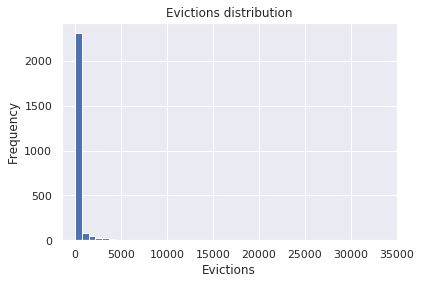

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

x=result['evictions']
hist = plt.hist(x, bins=40)
plt.xlabel("Evictions")
plt.ylabel("Frequency")
plt.xticks(np.arange(0, 37000, step=5000))
plt.yticks(np.arange(0, 2500, step=500))
plt.title('Evictions distribution')
plt.show()

In [ ]:
r=result['rucc']
hist = plt.hist(r)
plt.xlabel("rucc")
plt.ylabel("Frequency")
#plt.xticks(np.arange(0, 37000, step=5000))
#plt.yticks(np.arange(0, 2500, step=500))
plt.title('rucc distribution')
plt.show()

In [32]:
corr1=stat['pct_white'].corr(stat['evictions'])
corr2=stat['pct_af_am'].corr(stat['evictions'])
corr3=stat['pct_hispanic'].corr(stat['evictions'])
corr4=stat['pct_asian'].corr(stat['evictions'])

print ("White:", corr1 ,", Af-Am:", corr2, ", Hispanic:" ,corr3 ,", Asian:", corr4)

White: -0.27648066677086097 , Af-Am: 0.1937806729676832 , Hispanic: 0.1405203020375726 , Asian: 0.3166144370043819


In [42]:
states=result.groupby(['state','year'], sort=True).mean()
states.head(150)
#state2=states.loc[(states['state'] == 'de1c9a5')]
#state2.head()

row_id     population  renter_occupied_households  \
state   year                                                           
0df5b61 a     1324.250000   18102.625000                 2739.250000   
        b     1124.750000   18186.750000                 2691.125000   
105ac14 a     1241.617647   99491.117647                11287.088235   
        b     1251.647059   99487.588235                11136.117647   
26926ff a     1444.136364   61616.409091                 8892.159091   
        b     1384.227273   61802.318182                 8770.704545   
2af7250 a     1253.133333  207876.044444                29086.111111   
        b     1289.600000  207239.800000                28689.177778   
37520b7 a     1372.923077   73367.923077                 7408.512821   
        b     1310.075000   80436.450000                 8550.175000   
3c7c507 a     1155.314286   88599.457143                12260.457143   
        b     1120.000000   88572.085714                12133.628571   
408e6ed a     1220.448276   54393.482759                 9786.793103   
        b     1267.241379   54608.620690                 9549.896552   
429dafa a     1345.100000   64711.766667                 7983.366667   
        b     1262.233333   64994.133333                 7878.700000   
4a85da6 a     1169.000000  105447.000000                13674.500000   
        b     1522.000000   81850.000000                13358.000000   
533155c a     1221.645833   20401.916667                 2718.062500   
        b     1248.666667   20416.104167                 2684.916667   
56f170e a     1322.456522  139514.369565                18796.152174   
        b     1488.195652  139777.130435                18484.391304   
638a64a a     1309.666667  377246.333333                70036.500000   
        b     1315.666667  379576.666667                69264.500000   
6f7cad6 a     1233.125000  935932.312500               139003.375000   
        b     1294.055556  882954.500000               128698.166667   
720fc77 a     1279.478261  456616.826087                67910.739130   
        b     1072.521739  439079.652174                63949.173913   
7991172 a     1282.500000   30106.000000                 2992.500000   
        b     1587.500000   30184.000000                 2953.250000   
...                   ...            ...                         ...   
c47295b a     1225.500000  159757.312500                16377.812500   
        b     1286.562500  159724.875000                15991.812500   
c79e512 a     1275.000000  431460.000000                60679.000000   
        b      167.000000  868076.000000               128434.000000   
c8ee9c4 a     1059.722222   84211.944444                13066.138889   
        b     1327.285714   84793.228571                12958.857143   
d725a95 a     1431.255319  109647.617021                16230.723404   
        b     1292.148936  109643.553191                15861.617021   
d897010 a     1310.000000  484942.933333                69038.533333   
        b     1218.333333  484511.133333                67968.800000   
dc52510 a     1255.217391   54989.942029                 7853.884058   
        b     1221.220588   55288.691176                 7707.102941   
de1c9a5 a      542.500000  379380.000000                43053.500000   
        b     1107.000000  379352.000000                42276.500000   
e159269 a     1047.266667  141676.666667                19166.333333   
        b     1252.000000  137121.571429                17975.000000   
e602fb0 a     2343.500000  462999.000000                63120.500000   
        b      556.500000  401951.500000                67555.250000   
ea48b30 a     1144.923077  141136.230769                24765.153846   
        b     1262.153846  140900.615385                24256.230769   
f02e4c4 a      996.611111   57078.888889                 6166.888889   
        b     1283.527778   57171.611111                 6097.972222   
f1f4f42 a     1206.290323   37951.677419                 45